In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # óptimo = .8196
)

env = gym.make('FrozenLakeNotSlippery-v0')

In [3]:
tf.reset_default_graph()

In [4]:
#regresión lineal 16 entradas (estados) 4 salidas (acciones)

inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.zeros([16,4]))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [5]:
init = tf.global_variables_initializer()

y = .99
e = 0.5
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            rand = np.random.rand(1)[0]
            if rand < e:
                a[0] = env.action_space.sample()
            s1,r,d,_ = env.step(a[0])

            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1

            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            j+=1
            if d == True:
                if r>0:
                    e = 5./((i/500) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print(W1)
print("Porcentaje de episodios exitosos: " + str(sum(rList)/num_episodes) + "%")

[[ 0.94147938  0.95098943  0.93206447  0.94147938]
 [ 0.94147938  0.          0.88964468  0.89761448]
 [ 0.93106669  0.34456766  0.22655895  0.4139291 ]
 [ 0.60024714  0.          0.          0.        ]
 [ 0.95098943  0.96059549  0.          0.94147938]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.98009962  0.          0.82989973]
 [ 0.          0.          0.          0.        ]
 [ 0.96059549  0.          0.97029859  0.95098943]
 [ 0.96059549  0.98009104  0.98009968  0.        ]
 [ 0.97029859  0.98999977  0.          0.97029823]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.97363341  0.98999977  0.97029859]
 [ 0.98008966  0.98999977  0.99999988  0.98009968]
 [ 0.          0.          0.          0.        ]]
Porcentaje de episodios exitosos: 0.3195%


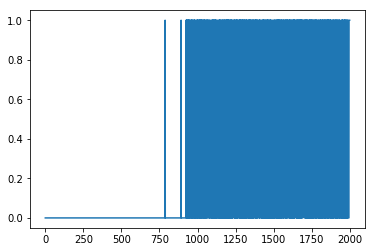

In [5]:
plt.plot(rList)

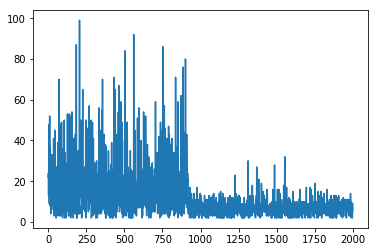

In [7]:
plt.plot(jList)